In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


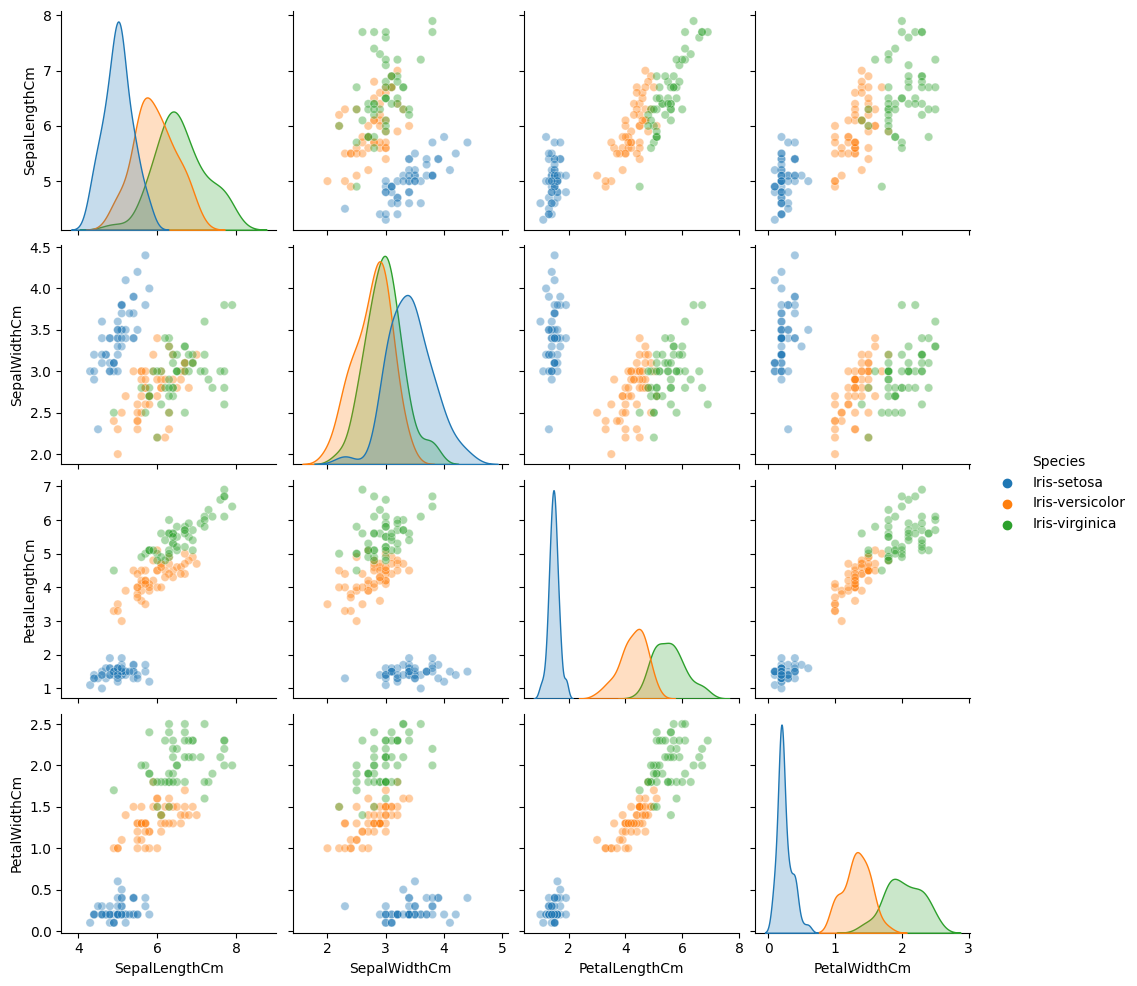

In [7]:
# plot

sns.pairplot(data, vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], hue = 'Species', 
             # markers=['o', 'D', '+'], error line
            plot_kws = {'alpha': .4});

In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data = data.drop(columns= ['Id', 'SepalWidthCm', 'PetalWidthCm','Species'])
data

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [10]:
# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

### Round 1

In [11]:
K = 3 # there are 3 groups
data = np.array(data)
data

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [12]:
C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
C_x

array([5, 5, 5])

In [13]:
C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)
C_y

array([2, 1, 4])

In [14]:
# Centriods

C = np.zeros((3, 2))
C

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [15]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [16]:
C[:, 0] = C_x 
C[:, 1] = C_y 
C

array([[5., 2.],
       [5., 1.],
       [5., 4.]])

### 2. Assign each data point to a specific cluster 

In [17]:
cluster_label = np.zeros((len(data), 1))
cluster_label

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [18]:
for i in range(len(data)): # run 150 rounds
    distance = distance_fn(data[i, :], C)
    cluster = np.argmin(distance) # for the shortest distance
    cluster_label[i] = cluster

In [19]:
(cluster_label == 0).sum()

28

### 3. Recalculate the new Contriods

In [20]:
C_old = C.copy()
C_old

array([[5., 2.],
       [5., 1.],
       [5., 4.]])

In [21]:
for i in range(K):
    pints = [] # empty list
    points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
    C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

### Check if centriods have changed, repeat step 2 and 3

In [22]:
# calculate error

error = distance_fn(C, C_old, None)
error

1.653967276349871

# create code to do looping to work as above steps

In [23]:
def plotCluster(data, C, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i])
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalalWidthCm')
    plt.title('Cluster')

0.2560962191734782
0.016641711628683525
0.0


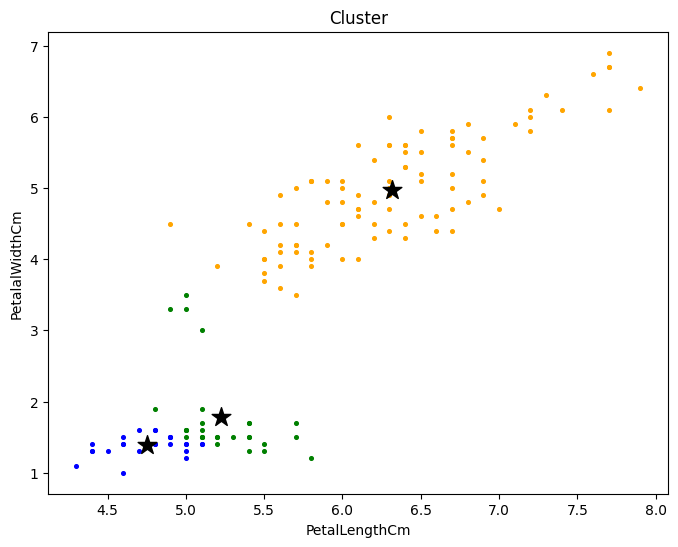

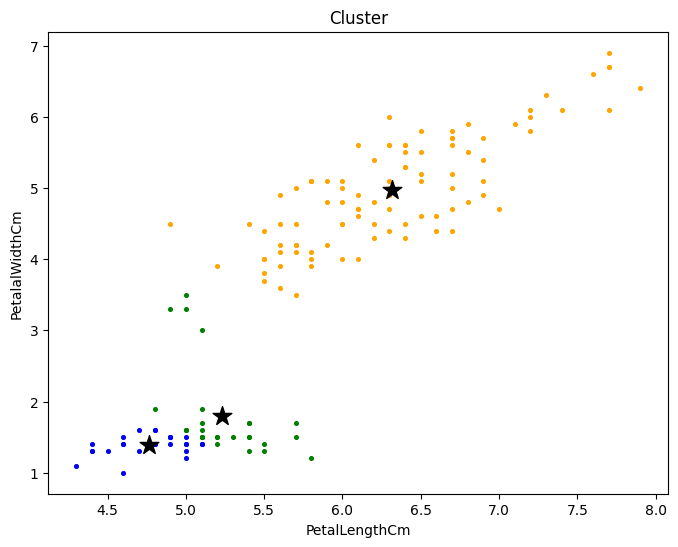

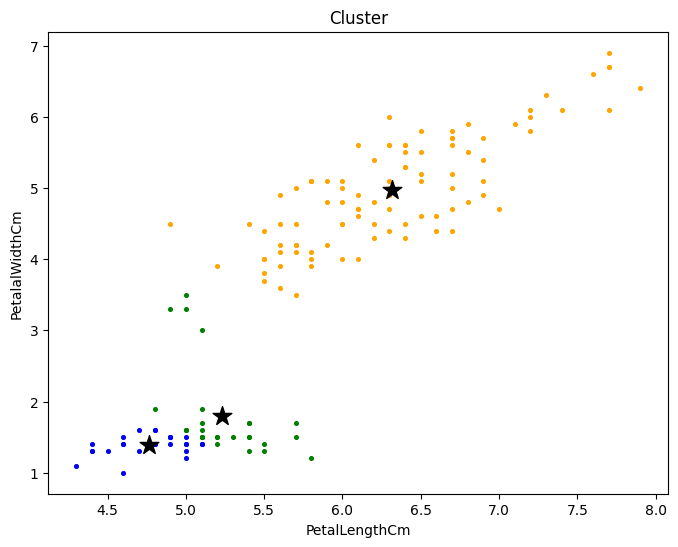

In [24]:
while error != 0: # will stop when error = 0
    
    cluster_label = np.zeros((len(data), 1))
    
    for i in range(len(data)):
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance)
        cluster_label[i] = cluster
    
    C_old = C.copy()
    
    for i in range(K):
        points = []
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis=0)
        
    plotCluster(data, C, cluster_label.copy())
    
    error = distance_fn(C, C_old, None)
    print(error)
